Question 1: What is the difference between K-Means and Hierarchical Clustering?
Provide a use case for each.

Asnwer: Difference between K-Means and Hierarchical Clustering
Aspect	K-Means Clustering	Hierarchical Clustering
Type	Partitional clustering	Hierarchical (tree-based) clustering
Number of clusters	Must be specified in advance (K)	Not required beforehand
Working principle	Assigns points to the nearest centroid and updates centroids iteratively	Builds clusters step-by-step using distance measures (agglomerative or divisive)
Output	Flat set of K clusters	Dendrogram (tree structure)
Scalability	Efficient for large datasets	Computationally expensive for large datasets
Sensitivity	Sensitive to initial centroid selection	Less sensitive to initialization
Cluster shape	Works best for spherical, equally sized clusters	Can capture complex cluster shapes
Use Case for Each

K-Means Clustering – Use Case
✔ Customer segmentation in marketing

When the number of customer groups is known in advance

Large datasets where speed and scalability are important

Example:
Segmenting customers into 5 groups based on purchasing behavior for targeted advertising.

Hierarchical Clustering – Use Case
✔ Gene expression or document clustering

When the number of clusters is unknown

When understanding relationships between clusters is important

Example:
Grouping genes based on expression patterns to study biological relationships using a dendrogram.

Question 2: Explain the purpose of the Silhouette Score in evaluating clustering
algorithms.

Answer: Purpose of the Silhouette Score in Evaluating Clustering Algorithms

The Silhouette Score is used to measure the quality of clustering by evaluating how well each data point fits within its assigned cluster compared to other clusters.

It considers two key factors for each data point:

a (intra-cluster distance): Average distance between the point and other points in the same cluster (measures cohesion).

b (nearest-cluster distance): Average distance between the point and points in the nearest neighboring cluster (measures separation).

The Silhouette Score for a point is calculated as:

Silhouette Score
=
𝑏
−
𝑎
max
Interpretation of the Score

+1: The point is well-clustered and far from neighboring clusters.

0: The point lies on the boundary between clusters.

–1: The point may be assigned to the wrong cluster.

Why It Is Important

Evaluates both cluster compactness and cluster separation simultaneously.

Helps compare and select the best clustering algorithm or optimal number of clusters (K).

Works without ground-truth labels, making it suitable for unsupervised learning.

Question 3: What are the core parameters of DBSCAN, and how do they influence the
clustering process?

Answer: DBSCAN (Density-Based Spatial Clustering of Applications with Noise) groups points based on density rather than distance to centroids.

Core Parameters
1. ε (Epsilon)

Defines the radius of the neighborhood around a point

Small ε → More noise, smaller clusters

Large ε → Clusters may merge

2. MinPts (Minimum Points)

Minimum number of points required to form a dense region

Low MinPts → Sensitive to noise

High MinPts → More robust clusters, fewer noise points

3. Distance Metric

Determines how distances are calculated (e.g., Euclidean, Manhattan)

Influences neighborhood shape and density estimation

Point Types in DBSCAN

Core Point: Has ≥ MinPts within ε

Border Point: Within ε of a core point but has fewer neighbors

Noise Point: Not within ε of any core point

Question 4: Why is feature scaling important when applying clustering algorithms like
K-Means and DBSCAN?

Answer: Feature scaling is important because clustering algorithms rely on distance calculations, and features with larger scales can dominate the distance measure.

Why scaling is necessary

Ensures all features contribute equally

Prevents bias toward features with larger numeric ranges

Improves cluster accuracy and stability

Impact on K-Means

K-Means uses Euclidean distance

Without scaling, centroids shift toward high-magnitude features

Leads to incorrect cluster assignments

Impact on DBSCAN

Density estimation depends on distances

Unscaled features distort neighborhood density

Results in poor cluster detection or excessive noise

Common Scaling Methods

Standardization (Z-score)

Min-Max normalization

Conclu

Question 5: What is the Elbow Method in K-Means clustering and how does it help
determine the optimal number of clusters?

Answer: The Elbow Method is a technique used to determine the optimal number of clusters (K) in K-Means clustering.

How It Works

Run K-Means for different values of K

Calculate Within-Cluster Sum of Squares (WCSS) for each K

Plot WCSS vs K

Elbow Point

WCSS decreases as K increases

The point where the decrease becomes slow (forming an “elbow”) indicates optimal K

Why It Works

Before elbow: adding clusters significantly improves clustering

After elbow: marginal improvement only




Dataset:
Use make_blobs, make_moons, and sklearn.datasets.load_wine() as
specified.
Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4),
apply KMeans clustering, and visualize the results with cluster centers.

Answer: Step 1: Generate synthetic data using make_blobs

We generate 300 samples with 4 centers (clusters).

Step 2: Apply KMeans clustering

We apply KMeans with n_clusters=4.

Step 3: Visualize the clusters and cluster centers


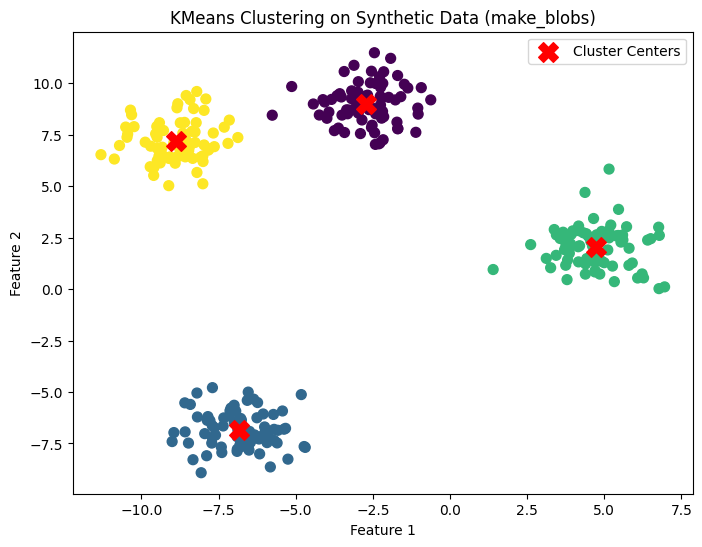

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Get cluster labels and centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centers[:, 0], centers[:, 1],
            c='red', s=200, marker='X', label='Cluster Centers')

plt.title("KMeans Clustering on Synthetic Data (make_blobs)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()



Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN
model. Print the number of clusters found (excluding noise).

Answer: ✅ Steps Involved

Load the Wine dataset

Standardize features using StandardScaler

Apply DBSCAN clustering

Count clusters (excluding noise label -1)

In [6]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load Wine dataset
wine = load_wine()
X = wine.data

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Count number of clusters (excluding noise)
unique_labels = set(labels)
num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

print("Number of clusters found (excluding noise):", num_clusters)


Number of clusters found (excluding noise): 0


Question 8: Generate moon-shaped synthetic data using
make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in
the plot.

Answer: ✅ Steps

Generate moon-shaped data

Apply DBSCAN clustering

Identify outliers (noise points)

Visualize clusters and outliers


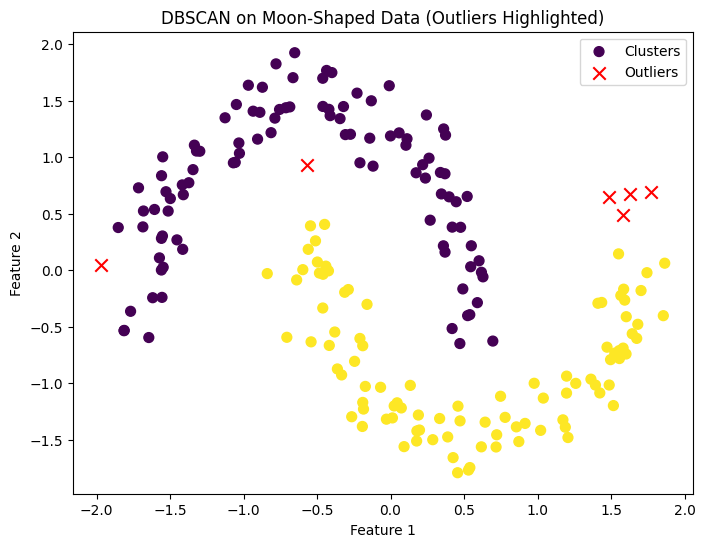

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

# Generate moon-shaped data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Identify outliers (noise points)
outliers = labels == -1

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[~outliers, 0], X_scaled[~outliers, 1],
            c=labels[~outliers], cmap='viridis', s=50, label='Clusters')

# Plot outliers
plt.scatter(X_scaled[outliers, 0], X_scaled[outliers, 1],
            c='red', s=80, marker='x', label='Outliers')

plt.title("DBSCAN on Moon-Shaped Data (Outliers Highlighted)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply
Agglomerative Clustering and visualize the result in 2D with a scatter plot.

Answer: ✅ Steps

Load the Wine dataset

Standardize the data

Reduce dimensions to 2 using PCA

Apply Agglomerative (Hierarchical) Clustering

Visualize the clusters using a scatter plot

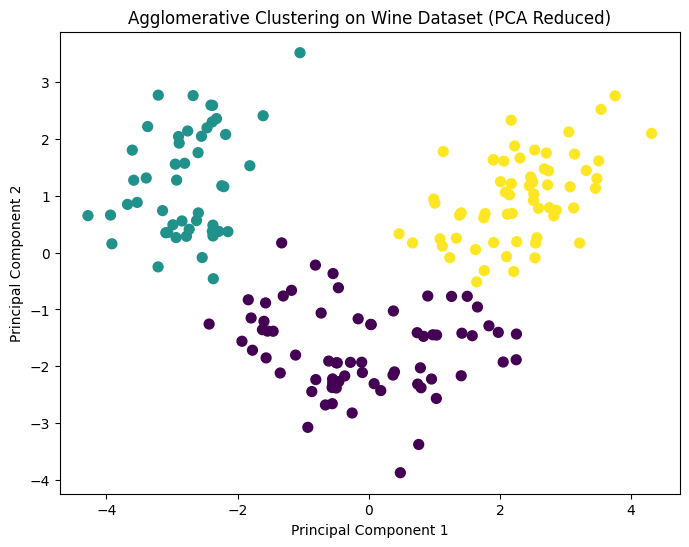

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Load Wine dataset
wine = load_wine()
X = wine.data

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
labels = agglo.fit_predict(X_pca)

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)

plt.title("Agglomerative Clustering on Wine Dataset (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


Question 10: You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run
targeted promotions. The dataset contains customer demographics and their product
purchase history across categories.
Describe your real-world data science workflow using clustering:
● Which clustering algorithm(s) would you use and why?
● How would you preprocess the data (missing values, scaling)?
● How would you determine the number of clusters?
● How would the marketing team benefit from your clustering analysis?

Answer: 1. Clustering Algorithm(s) to Use & Why

I would consider multiple clustering algorithms and choose based on data characteristics:

🔹 K-Means Clustering

Best for large datasets

Easy to interpret

Works well when clusters are spherical and well separated

Ideal for numerical purchase behavior features (spend, frequency, recency)

👉 Primary choice for marketing segmentation

🔹 Hierarchical Clustering

Helps understand relationships between customer groups

Useful for visualization (dendrogram)

Good for smaller samples or exploratory analysis

🔹 DBSCAN (optional)

Useful if data has outliers or irregular-shaped clusters

Can identify noise customers (very rare buyers or fraud-like behavior)

2. Data Preprocessing Steps
🔹 Handling Missing Values

Numerical features → Fill with mean/median

Categorical features → Fill with mode or create an “Unknown” category

Remove rows only if missing values are excessive

🔹 Feature Engineering

Convert purchase history into meaningful metrics:

Recency (days since last purchase)

Frequency (number of purchases)

Monetary value (total/average spend)

One-hot encode categorical variables (gender, location, device type)

🔹 Feature Scaling

Apply StandardScaler or MinMaxScaler

Necessary because clustering is distance-based and sensitive to scale

3. Determining the Number of Clusters
🔹 Elbow Method

Plot inertia vs. number of clusters

Look for the point where improvement slows down

🔹 Silhouette Score

Measures how well customers fit within their cluster

Higher score → better clustering

🔹 Business Interpretation

Choose a number of clusters that are actionable (e.g., 4–6 segments)

Avoid too many clusters that marketing can’t practically target

4. How the Marketing Team Benefits
🎯 Targeted Promotions

High-value loyal customers → exclusive discounts

Price-sensitive customers → coupons and deals

Inactive customers → re-engagement campaigns

📈 Improved Conversion Rates

Personalized campaigns based on customer behavior

Reduced marketing spend waste

🛍️ Product Recommendations

Recommend products based on cluster buying patterns

💡 Strategic Decision-Making

Identify churn-risk customers

Discover new customer segments

Support long-term customer retention strategies

✅ Summary

By usi